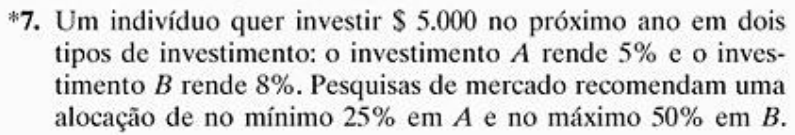
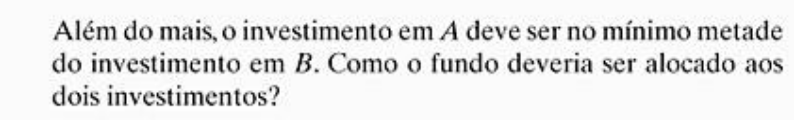

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Alocacao_Otima_Investimentos')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos investimentos para referência
investimentos = ['A', 'B']

# Dados financeiros
capital_total = 5000
taxa_retorno = {'A': 0.05, 'B': 0.08}

# Regras de alocação
# Mínimo de 25% em A
limite_min_A = 0.25 * capital_total

# Máximo de 50% em B
limite_max_B = 0.50 * capital_total

In [4]:
# 1. Variáveis de Decisão
# Valor ($) a ser alocado em cada tipo de investimento
valor_investido = model.continuous_var_dict(investimentos, name='Valor')


# 2. Função Objetivo
# Maximizar o retorno total
expressao_retorno = (taxa_retorno[i] * valor_investido[i] for i in investimentos)
soma_retorno_total = model.sum(expressao_retorno)
model.maximize(soma_retorno_total)


# 3. Restrições

# Restrição 1: Uso do Capital Total
# A soma dos valores investidos deve ser exatamente igual ao capital disponível.
expressao_investimento_total = (valor_investido[i] for i in investimentos)
soma_investimento_total = model.sum(expressao_investimento_total)
restr_capital_total_logica = soma_investimento_total == capital_total
model.add_constraint(restr_capital_total_logica, ctname='uso_capital_total')

# Restrição 2: Alocação Mínima em A
# O valor em A deve ser no mínimo 25% do total ($1250).
restr_min_A_logica = valor_investido['A'] >= limite_min_A
model.add_constraint(restr_min_A_logica, ctname='alocacao_min_A')

# Restrição 3: Alocação Máxima em B
# O valor em B deve ser no máximo 50% do total ($2500).
restr_max_B_logica = valor_investido['B'] <= limite_max_B
model.add_constraint(restr_max_B_logica, ctname='alocacao_max_B')

# Restrição 4: Relação entre A e B
# O investimento em A deve ser no mínimo metade do investimento em B (A >= 0.5 * B).
restr_ratio_AB_logica = valor_investido['A'] - 0.5 * valor_investido['B'] >= 0
model.add_constraint(restr_ratio_AB_logica, ctname='ratio_A_vs_B')

docplex.mp.LinearConstraint[ratio_A_vs_B](Valor_A-0.500Valor_B,GE,0)

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
LP Presolve eliminated 4 rows and 2 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

------ SOLUÇÃO ÓTIMA ------

solution for: Alocacao_Otima_Investimentos
objective: 325
status: OPTIMAL_SOLUTION(2)
Valor_A=2500.000
Valor_B=2500.000

